In [ ]:
#| hide
import nbdev

In [ ]:
from dji_thermal_sdk.dji_sdk import *
from dji_thermal_sdk.utility import rjpeg_to_heatmap, rjpeg_to_thermal
import dji_thermal_sdk.dji_sdk as DJI
import ctypes as CT
from ctypes import *
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# DJI Thermal SDK

> use ctypes to capsulate the DJI Thermal SDK so that we can directly use python to process thermal images. 

This version of DJI Thermal SDK is 1.3, which was published on 05/15/2022

## Install

`pip install dji_thermal_sdk`

## The package only can work on Windows System.

Normally, DJI SDK DLLs include `libdirp.dll, libv_dirp.dll, libv_girp.dll, libv_iirp.dll, libv_list.ini`.  

DJI does not provide the library for Linux. Therefore, if you run the package on Linux,  python complier will pop out 'invalid ELF header' error.  

Firstly, you should invoke 'dji_init' to initialize DJI sdk environment. This step is very important

## Initialize the DJI environment. This step is very important

In [ ]:
nbdev.show_doc(dji_init)

---

### dji_init

>      dji_init (dllpath:str=None)

if you don't provide the file path of 'libdirp.dll', the default 'libdirp.dll' with version 1.3 will be automatically chosen.

In [ ]:
dji_init()
DJI._libdirp

<CDLL 'C:\Users\hxl170008\Documents\git_repo\dji_thermal_sdk\dji_thermal_sdk\libdirp.dll', handle 7ffcdb580000>

## Get the handle of a R-JPEG image

DIRP_HANDLE is a void pointer, and it has been definded.  
you can get it by `package.DIRP_HANDLE`

In [ ]:
nbdev.show_doc(dirp_create_from_rjpeg)

---

### dirp_create_from_rjpeg

>      dirp_create_from_rjpeg (data, size, ph)

Parameters:
    [in] data: R-JPEG binary data buffer pointer
    [in] size: R-JPEG binary data buffer size in bytes
    [out]ph  : DIRP API handle pointer 
        - reminder: use two-level pointer to assign value to one-level pointer
Return:
    int return code dirp_ret_code_e

In [ ]:
rd = r"dataset\Deer_Goats_Unsure.jpg"
with open(rd, 'rb') as f:
    content = f.read()
    print(len(content))
# method1 to get the file size
print(f"File size: {os.path.getsize(rd)}")
# method 2 to get the file size
file_stat = os.stat(rd)
size = c_int32(file_stat.st_size)
print(f"File size: {size}")

# the method to create a string buffer, which is important.
rjpeg_data = CT.create_string_buffer(len(content))
rjpeg_data.value = content
print(f"rjpeg_data: {rjpeg_data}")

# test the function to create a handle of an image
ret = dirp_create_from_rjpeg(rjpeg_data,size, CT.byref(DIRP_HANDLE))
print(f'ret = {ret}')
if ret == 0:
    print("successfully get the r-jpeg handle.")
#
print(f"DIRP_HANDLE: {DIRP_HANDLE}  address: {hex(DIRP_HANDLE.value)} ")


1367428
File size: 1367428
File size: c_long(1367428)
rjpeg_data: <ctypes.c_char_Array_1367428 object>
ret = 0
successfully get the r-jpeg handle.
DIRP_HANDLE: c_void_p(2201333297840)  address: 0x20089b072b0 


## Get the version of API

In [ ]:
nbdev.show_doc(dirp_get_api_version)

<h4 id="dirp_get_api_version" class="doc_header"><code>dirp_get_api_version</code><a href="https://github.com/lyuhaitao/dji_thermal_sdk/tree/master/dji_thermal_sdk/dji_sdk.py#L193" class="source_link" style="float:right">[source]</a></h4>

> <code>dirp_get_api_version</code>(**`version`**)

Parameters:
    [out] version DIRP API version information pointer
Return:
    int return code dirp_ret_code_e

In [ ]:
nbdev.show_doc(dirp_api_version_t)

<h2 id="dirp_api_version_t" class="doc_header"><code>class</code> <code>dirp_api_version_t</code><a href="https://github.com/lyuhaitao/dji_thermal_sdk/tree/master/dji_thermal_sdk/dji_sdk.py#L68" class="source_link" style="float:right">[source]</a></h2>

> <code>dirp_api_version_t</code>() :: `Structure`

API version structure definition

In [ ]:
jpeg_version = dirp_api_version_t() 
ret = dirp_get_api_version(CT.byref(jpeg_version))
if ret == DIRP_SUCCESS:
    print("Success")
#
print(f"jpeg_version.api: \t {jpeg_version.api}")
print(f"jpeg_version.magic: \t {jpeg_version.magic}")


Success
jpeg_version.api: 	 19
jpeg_version.magic: 	 b'b85e4d3'


## Get the version of DJI JPG

In [ ]:
nbdev.show_doc(dirp_get_rjpeg_version)

---

### dirp_get_rjpeg_version

>      dirp_get_rjpeg_version (h, version)

Get R-JPEG version.
Parameters
    [in]h:DIRP API handle
    [out]version: R-JPEG version information pointer
Returns
    int return code dirp_ret_code_e

In [ ]:
nbdev.show_doc(dirp_rjpeg_version_t)

---

### dirp_rjpeg_version_t



R-JPEG version structure definition

In [ ]:
jpeg_version = dirp_rjpeg_version_t()
ret = dirp_get_api_version(CT.byref(jpeg_version))
if ret == DIRP_SUCCESS:
    print("Success")
#
print(f"rjpeg:{jpeg_version.rjpeg}")
print(f"header:{jpeg_version.header}")
print(f"curve:{jpeg_version.curve}")

Success
rjpeg:19
header:1697986658
curve:3367988


## Get Color Bar

In [ ]:
nbdev.show_doc(dirp_get_color_bar)

<h4 id="dirp_get_color_bar" class="doc_header"><code>dirp_get_color_bar</code><a href="https://github.com/lyuhaitao/dji_thermal_sdk/tree/master/dji_thermal_sdk/dji_sdk.py#L205" class="source_link" style="float:right">[source]</a></h4>

> <code>dirp_get_color_bar</code>(**`h`**, **`color_bar`**)

Parameters:
    [in]  h: DIRP API handle
    [out] color_bar: ISP color bar parameters pointer
Return:
    int return code dirp_ret_code_e

In [ ]:
nbdev.show_doc(dirp_color_bar_t)

<h2 id="dirp_color_bar_t" class="doc_header"><code>class</code> <code>dirp_color_bar_t</code><a href="https://github.com/lyuhaitao/dji_thermal_sdk/tree/master/dji_thermal_sdk/dji_sdk.py#L74" class="source_link" style="float:right">[source]</a></h2>

> <code>dirp_color_bar_t</code>() :: `Structure`

Color bar parameters structure definition

In [ ]:
jpeg_color_bar = dirp_color_bar_t()
ret = dirp_get_color_bar(DIRP_HANDLE, CT.byref(jpeg_color_bar))
if ret == DIRP_SUCCESS:
    print("Success")
print(f"jpeg_color_bar.high: \t {jpeg_color_bar.high}")
print(f"jpeg_color_bar.low: \t {jpeg_color_bar.low}")
print(f"jpeg_color_bar.manual_enable: \t {jpeg_color_bar.manual_enable}")

Success
jpeg_color_bar.high: 	 -131073.015625
jpeg_color_bar.low: 	 9.10844001811131e-44
jpeg_color_bar.manual_enable: 	 False


## Get the resolution of a R-JPEG image

nbdev.show_doc(dirp_create_from_rjpeg)

In [ ]:
nbdev.show_doc(dirp_get_rjpeg_resolution)

<h4 id="dirp_get_rjpeg_resolution" class="doc_header"><code>dirp_get_rjpeg_resolution</code><a href="https://github.com/lyuhaitao/dji_thermal_sdk/tree/master/dji_thermal_sdk/dji_sdk.py#L336" class="source_link" style="float:right">[source]</a></h4>

> <code>dirp_get_rjpeg_resolution</code>(**`h`**, **`rjpeg_info`**)

Get R-JPEG image resolution information.
Parameters
    [in]h: DIRP API handle
    [out]rjpeg_info: R-JPEG basic information pointer
Returns
    int return code dirp_ret_code_e

In [ ]:
nbdev.show_doc(dirp_resolution_t)

<h2 id="dirp_resolution_t" class="doc_header"><code>class</code> <code>dirp_resolution_t</code><a href="https://github.com/lyuhaitao/dji_thermal_sdk/tree/master/dji_thermal_sdk/dji_sdk.py#L133" class="source_link" style="float:right">[source]</a></h2>

> <code>dirp_resolution_t</code>() :: `Structure`

The image size structure definition

In [ ]:
rjpeg_resolution = dirp_resolution_t()
ret = dirp_get_rjpeg_resolution(DIRP_HANDLE, CT.byref(rjpeg_resolution))
print(f'ret = {ret}')
if ret == 0:
    print("successfully get the resolution.")

out = f'Height: {rjpeg_resolution.height}, width: {rjpeg_resolution.width}'
out


ret = 0
successfully get the resolution.


'Height: 512, width: 640'

## Set Pseudo Color

In [ ]:
nbdev.show_doc(dirp_set_pseudo_color)

---

[source](https://github.com/lyuhaitao/dji_thermal_sdk/blob/master/dji_thermal_sdk/dji_sdk.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### dirp_set_pseudo_color

>      dirp_set_pseudo_color (h, pseudo_color)

Set custom ISP pseudo color type.
Parameters
    [in]h:DIRP API handle
    [in]pseudo_color:ISP pseudo color type dirp_pseudo_color_e
Returns
    int return code dirp_ret_code_e

- DIRP_PSEUDO_COLOR_WHITEHOT   = 0
- DIRP_PSEUDO_COLOR_FULGURITE  = 1
- DIRP_PSEUDO_COLOR_IRONRED    = 2
- DIRP_PSEUDO_COLOR_HOTIRON    = 3
- DIRP_PSEUDO_COLOR_MEDICAL    = 4
- DIRP_PSEUDO_COLOR_ARCTIC     = 5
- DIRP_PSEUDO_COLOR_RAINBOW1   = 6
- DIRP_PSEUDO_COLOR_RAINBOW2   = 7
- DIRP_PSEUDO_COLOR_TINT       = 8
- DIRP_PSEUDO_COLOR_BLACKHOT   = 9

In [ ]:
ret = dirp_set_pseudo_color(DIRP_HANDLE, c_int(0))
if ret == DIRP_SUCCESS:
    print("Success")
else:
    print(f"Error: ret={ret}")


Success


## Transform a thermal image by a specific palette

In [ ]:
nbdev.show_doc(dirp_process)

---

### dirp_process

>      dirp_process (h, color_image, size)

Run ISP algorithm with RAW data in R-JPEG and output RGB pseudo color image.
The ISP configurable parameters can be modifed by these APIs:
    dirp_set_enhancement_params
    dirp_set_isotherm
    dirp_set_color_bar
    dirp_set_pseudo_color
Parameters
    [in]h:DIRP API handle
    [out]color_image:Color image data buffer pointer
    [in]size:Color image data buffer size in bytes.
Returns
    int return code dirp_ret_code_e

In [ ]:
size = rjpeg_resolution.height * rjpeg_resolution.width * 3 * CT.sizeof(c_uint8)
raw_image_buffer = CT.create_string_buffer(size)
print(raw_image_buffer.raw[100])
ret = dirp_process(DIRP_HANDLE,byref(raw_image_buffer), size)
if ret == DIRP_SUCCESS:
    print("Success")
else:
    print(f"Error: ret={ret}")
#
raw_file_path = os.path.splitext(rd)[0] + ".raw"
print(raw_file_path)
with open(raw_file_path, 'wb') as f:
    f.write(raw_image_buffer.raw)
#
if os.path.exists(raw_file_path):
    print(f"Success! file size: {os.path.getsize(raw_file_path)}")
else:
    print("Error")
#
with open(raw_file_path, encoding='cp1252') as fin:
    img = np.fromfile(fin, dtype = np.uint8)
    print(img.shape)
    img.shape = (512,640,3)
    #original = Image.fromarray(img)
#

fig = plt.figure(figsize=(10,8))
plt.imshow(img, cmap='gray')

## rjpge_to_thermal

In [ ]:
nbdev.show_doc(rjpeg_to_thermal)

---

### rjpeg_to_thermal

>      rjpeg_to_thermal (src:str, palette:int)

parameters:
    [str] src: file path of original jpg. For example, c:\deer.jpg
    [int] palette: the number of palette
            - DIRP_PSEUDO_COLOR_WHITEHOT   = 0
            - DIRP_PSEUDO_COLOR_FULGURITE  = 1
            - DIRP_PSEUDO_COLOR_IRONRED    = 2
            - DIRP_PSEUDO_COLOR_HOTIRON    = 3
            - DIRP_PSEUDO_COLOR_MEDICAL    = 4
            - DIRP_PSEUDO_COLOR_ARCTIC     = 5
            - DIRP_PSEUDO_COLOR_RAINBOW1   = 6
            - DIRP_PSEUDO_COLOR_RAINBOW2   = 7
            - DIRP_PSEUDO_COLOR_TINT       = 8
            - DIRP_PSEUDO_COLOR_BLACKHOT   = 9
return:
    return numpy.ndarray -> img

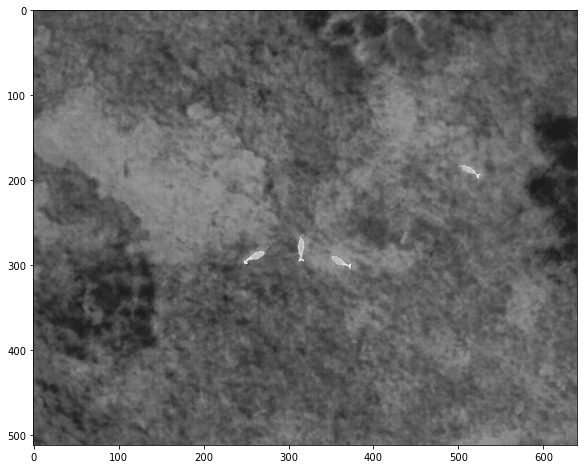

In [ ]:
if DJI._libdirp == "":
    print("run dji_init() to initialize the DJI sdk.")
src = r"dataset\Deer_Goats_Unsure.jpg"
img = rjpeg_to_thermal(src,0)
fig = plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

## rjpge_to_heatmap

In [ ]:
nbdev.show_doc(rjpeg_to_heatmap)

---

### rjpeg_to_heatmap

>      rjpeg_to_heatmap (src:str, dtype='float32')

parameters:
    [str] src: file path of original jpg. For example, c:\deer.jpg
    [str] dtype: 'float32' or 'int16'
return:
    return numpy.ndarray -> img

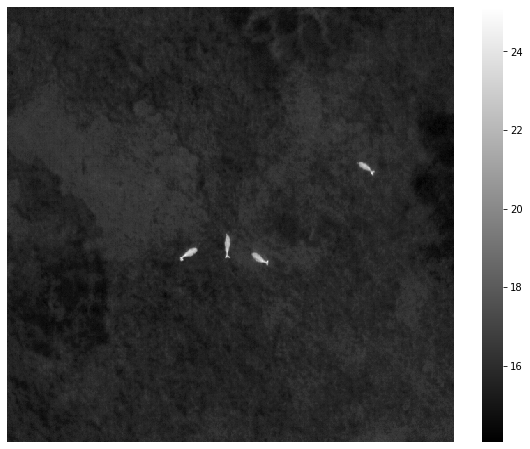

In [ ]:
if DJI._libdirp == "":
    print("run dji_init() to initialize the DJI sdk.")
src = r"dataset\Deer_Goats_Unsure.jpg"
img = rjpeg_to_heatmap(src,dtype='float32')
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(img, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

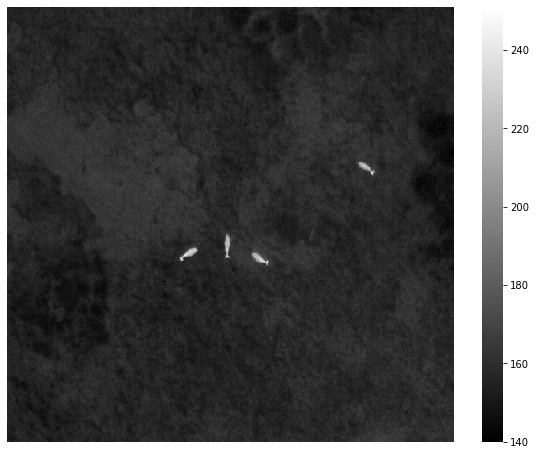

In [ ]:
if DJI._libdirp == "":
    print("run dji_init() to initialize the DJI sdk.")
src = r"dataset\Deer_Goats_Unsure.jpg"
img = rjpeg_to_heatmap(src,dtype='int16')
fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(img, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
plt.show()